# PredWeather by NOAA data

In [280]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import sklearn.metrics as metrics

In [281]:
class PredWeather:
    def __init__(self, file_name: str, forcast_days: int, target_col: str = "TMAX"):
        self.file_name = file_name
        self.forcast_days = forcast_days
        self.target_col = target_col
            
    def read_data(self):
        df = pd.read_csv(self.file_name, index_col=False)    #no index column
        df.index = df.DATE                              #set index to date column
        df["TARGET"] = df[self.target_col].shift(-self.forcast_days)  #create target column
        print(f"Your data (length of {len(df)}) has been read successfully.")
        self.data = df
        
    def isnull(self):
        """To see how many missing values are in the dataset"""
        print("The percentage of missing values in the dataset is: ")
        print(round(self.data.isnull().sum()/len(self.data)*100, 2))
        
    def drop_columns(self, columns: list):
        """To drop columns from the dataset"""
        try:
            self.data = self.data.drop(columns, axis=1)
        except KeyError:
            print("The columns are not existing or you have already dropped them.")
            
    def dropna(self, how: str = "all"):
        """To drop a row where all values are missing"""
        self.data = self.data.dropna(how=how)
        
    def fillna(self, method: str = "ffill"):
        """To fill missing values in the dataset"""
        if method == "ffill":
            self.data = self.data.ffill()
        if method == "bfill":
            self.data = self.data.bfill()
            
    def split_data(self, test_size: float = 0.2):
        x = self.data.drop("TARGET", axis=1)
        y = self.data["TARGET"]
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=test_size)
        print(f"Your data has been split successfully. The training data has {len(self.x_train)} and the test data has {len(self.x_test)}")
        
    def train_model(self, alpha: float = 0.2):
        reg = Ridge(alpha=0.1)
        reg.fit(self.x_train, self.y_train)
        self.model = reg
        print("Your model has been trained successfully.")
        
    def predict(self):
        self.y_pred = self.model.predict(self.x_test)
        self.y_pred_df = pd.DataFrame(self.y_pred, columns=["PREDICTION"], index=self.y_test.index)
        self.combined = pd.concat([pd.DataFrame(self.y_test), self.y_pred_df], axis=1)
        self.combined.sort_index(inplace=True)
        self.combined.to_csv("combined.csv")
        
    def evaluate(self):
        print(f"The mean squared error is: {metrics.mean_squared_error(self.y_test, self.y_pred)}")
        print(f"The mean absolute error is: {metrics.mean_absolute_error(self.y_test, self.y_pred)}")
        print(f"The r2 score is: {metrics.r2_score(self.y_test, self.y_pred)}")    
            
    

In [282]:
weather = PredWeather('data.csv', 1)  #create an instance of the class
weather.read_data()   #to read the data
weather.isnull()    #to check for missing values


Your data (length of 2328) has been read successfully.
The percentage of missing values in the dataset is: 
STATION             0.00
NAME                0.00
LATITUDE            0.00
LONGITUDE           0.00
ELEVATION           0.00
DATE                0.00
PRCP                1.76
PRCP_ATTRIBUTES     1.76
SNWD               62.50
SNWD_ATTRIBUTES    62.50
TAVG               51.42
TAVG_ATTRIBUTES    51.42
TMAX                0.90
TMAX_ATTRIBUTES     0.90
TMIN                0.30
TMIN_ATTRIBUTES     0.30
WDFG               50.69
WDFG_ATTRIBUTES    50.69
WSFG               50.69
WSFG_ATTRIBUTES    50.69
TARGET              0.95
dtype: float64


In [283]:
weather.dropna()    #to drop rows with missing values
weather.isnull()    #to check for missing values again
print(len(weather.data))  #to check the length of the dataset   

The percentage of missing values in the dataset is: 
STATION             0.00
NAME                0.00
LATITUDE            0.00
LONGITUDE           0.00
ELEVATION           0.00
DATE                0.00
PRCP                1.76
PRCP_ATTRIBUTES     1.76
SNWD               62.50
SNWD_ATTRIBUTES    62.50
TAVG               51.42
TAVG_ATTRIBUTES    51.42
TMAX                0.90
TMAX_ATTRIBUTES     0.90
TMIN                0.30
TMIN_ATTRIBUTES     0.30
WDFG               50.69
WDFG_ATTRIBUTES    50.69
WSFG               50.69
WSFG_ATTRIBUTES    50.69
TARGET              0.95
dtype: float64
2328


In [284]:
weather.drop_columns(['STATION', "NAME", "LATITUDE", "LONGITUDE", "ELEVATION", "DATE", "SNWD", "SNWD_ATTRIBUTES", "TAVG", "TAVG_ATTRIBUTES", "WDFG", "WDFG_ATTRIBUTES", "WSFG", "WSFG_ATTRIBUTES"])
weather.data.head()

,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TARGET
DATE,,,,,,,
2011-12-19,0.0,",,C",-4.1,",,C",-8.2,",,C",1.6
2011-12-20,0.0,",,C",1.6,",,C",-6.4,",,C",-3.1
2011-12-21,0.0,",,C",-3.1,",,C",-7.4,",,C",-4.0
2011-12-22,0.0,",,C",-4.0,",,C",-12.3,",,C",-3.4
2011-12-23,0.0,",,C",-3.4,",,C",-8.4,",,C",1.8


In [285]:
weather.data.dtypes

PRCP               float64
PRCP_ATTRIBUTES     object
TMAX               float64
TMAX_ATTRIBUTES     object
TMIN               float64
TMIN_ATTRIBUTES     object
TARGET             float64
dtype: object

In [286]:
weather.drop_columns(['PRCP_ATTRIBUTES', 'TMAX_ATTRIBUTES', 'TMIN_ATTRIBUTES'])
weather.data.head()

,PRCP,TMAX,TMIN,TARGET
DATE,,,,
2011-12-19,0.0,-4.1,-8.2,1.6
2011-12-20,0.0,1.6,-6.4,-3.1
2011-12-21,0.0,-3.1,-7.4,-4.0
2011-12-22,0.0,-4.0,-12.3,-3.4
2011-12-23,0.0,-3.4,-8.4,1.8


In [287]:
weather.isnull()

The percentage of missing values in the dataset is: 
PRCP      1.76
TMAX      0.90
TMIN      0.30
TARGET    0.95
dtype: float64


In [288]:
weather.fillna(method="ffill")
weather.isnull()

The percentage of missing values in the dataset is: 
PRCP      0.0
TMAX      0.0
TMIN      0.0
TARGET    0.0
dtype: float64


In [289]:
weather.split_data()
weather.train_model(alpha=0.07)
weather.predict()
weather.combined.head()

Your data has been split successfully. The training data has 1862 and the test data has 466
Your model has been trained successfully.


,TARGET,PREDICTION
DATE,,
2017-10-01,17.0,17.454835
2013-02-28,-5.3,-6.496420
2015-09-28,15.7,12.514099
2013-06-09,24.3,19.766776
2015-11-19,-5.9,-1.031945


In [290]:
weather.evaluate()

The mean squared error is: 21.020119848212524
The mean absolute error is: 3.540862283177557
The r2 score is: 0.9067108389147776


<Axes: xlabel='DATE'>

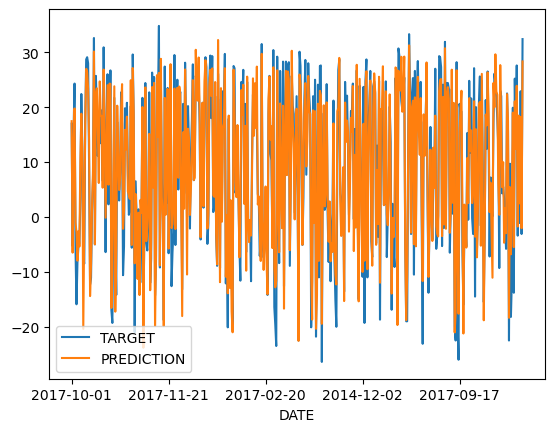

In [291]:
weather.combined.plot()